In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("US CPI.csv")
data

,Yearmon,CPI
0,01-01-1913,9.800
1,01-02-1913,9.800
2,01-03-1913,9.800
3,01-04-1913,9.800
4,01-05-1913,9.700
...,...,...
1298,01-03-2021,264.877
1299,01-04-2021,267.054
1300,01-05-2021,269.195
1301,01-06-2021,271.696


In [ ]:
data['Yearmon'] = pd.to_datetime(data['Yearmon'], format='%d-%m-%Y')
data.set_index('Yearmon', inplace=True)
print(data)

                CPI
Yearmon            
1913-01-01    9.800
1913-02-01    9.800
1913-03-01    9.800
1913-04-01    9.800
1913-05-01    9.700
...             ...
2021-03-01  264.877
2021-04-01  267.054
2021-05-01  269.195
2021-06-01  271.696
2021-07-01  273.003

[1303 rows x 1 columns]


Here we have parsed the column 'yearmon' as index as it is useful to read the data in a particular series.

In [ ]:
monthly_data = data.resample('M').mean()

<ipython-input-6-945363c6adc3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [ ]:
data.head()

,CPI
Yearmon,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


we have used the head() function to read the top 5 data rows to understand the data much better

In [ ]:
data.shape

(1303, 1)

shape function is used to finout the number of rows and columns in the dataset. Here we have 1303 rows and 1 column.

In [ ]:
data.describe()

,CPI
count,1303.000000
mean,82.638309
std,80.369187
min,9.700000
25%,17.450000
50%,33.100000
75%,147.750000
max,273.003000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 1913-01-01 to 2021-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     1303 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


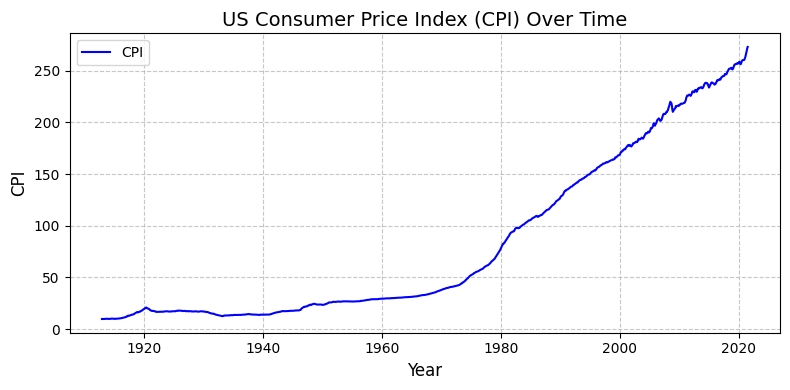

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(data.index, data['CPI'], label='CPI', color='blue', linewidth=1.5)

plt.xlabel('Year', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.title('US Consumer Price Index (CPI) Over Time', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


The x-axis represents the years and the y-axis represents the CPI value. And the uptrend in the plot is clearly visible.

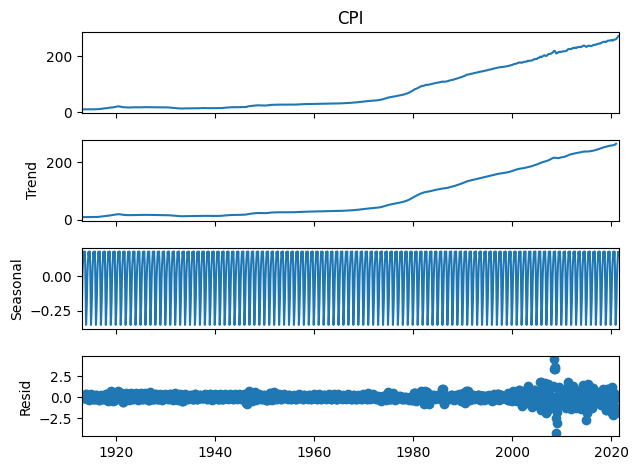

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['CPI'], model='additive', period=12)  # Assuming monthly data

result.plot()
plt.tight_layout()
plt.show()


we used seasonal decomposing to know if there is seasonality present in the data or not. So, after decomposing the data we can clearly tell that the trend and seasonality both are present in the data. Hence the data is non stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
adf_result = adfuller(data['CPI'])
print("ADF Test:")
print(f"Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")
if adf_result[1] < 0.05:
    print("The series is stationary according to the ADF test.")
else:
    print("The series is non-stationary according to the ADF test.")



ADF Test:
Test Statistic: 4.138694139208869
p-value: 1.0
Critical Values:
   1%: -3.435437251933509
   5%: -2.863786592704128
   10%: -2.567966103183712
The series is non-stationary according to the ADF test.


In [ ]:
# KPSS Test
kpss_result = kpss(data['CPI'], regression='c')
print("\nKPSS Test:")
print(f"Test Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")
if kpss_result[1] < 0.05:
    print("The series is non-stationary according to the KPSS test.")
else:
    print("The series is stationary according to the KPSS test.")



KPSS Test:
Test Statistic: 5.274013642170098
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
The series is non-stationary according to the KPSS test.


<ipython-input-14-08d4f4970e6c>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data['CPI'], regression='c')


Since, both the tests returned that the series is non-stationary.
The p-value in ADF test is higher than the defined p-value, and it lowers then the defined p-value in KPSS test.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

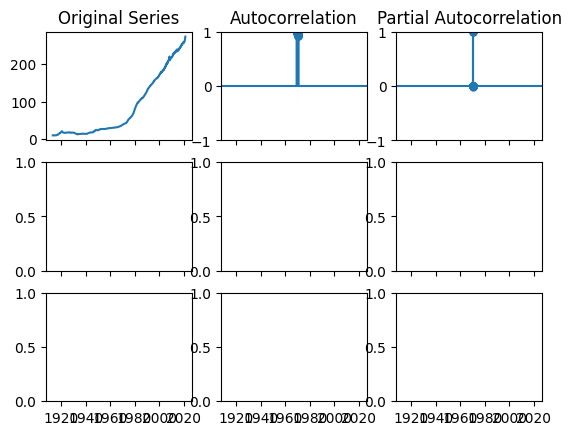

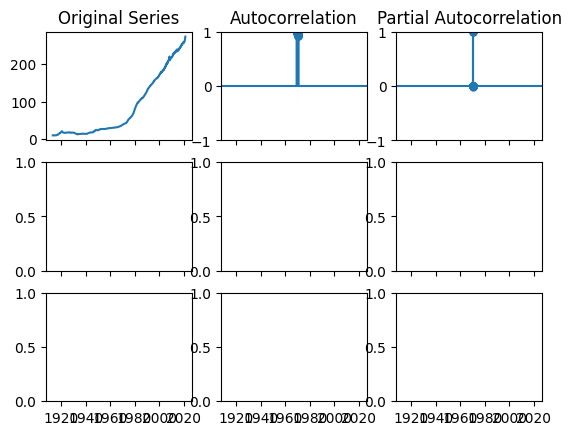

In [ ]:
#Original series
fig, axes = plt.subplots(3,3, sharex = True)
axes[0,0].plot(data['CPI'])
axes[0,0].set_title('Original Series')
plot_acf(data['CPI'], ax = axes[0,1])
plot_pacf(data['CPI'], ax = axes[0,2])

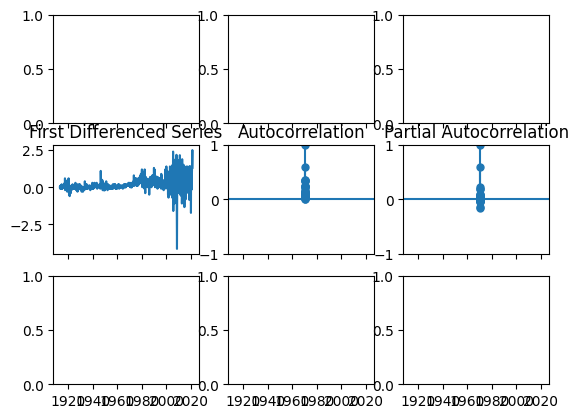

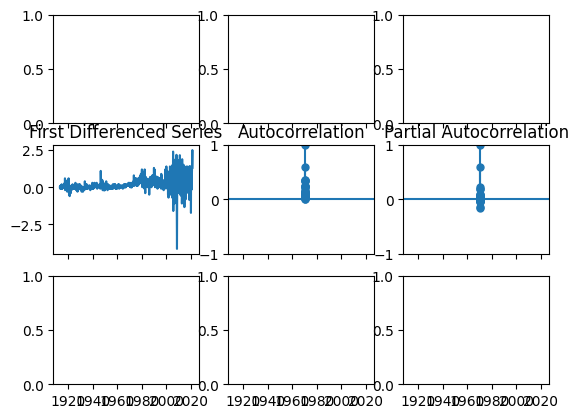

In [ ]:
# First Differencing
data['CPI_diff'] = data['CPI'].diff()
data = data.dropna()

# Plot the differenced series
fig, axes = plt.subplots(3, 3, sharex=True)
axes[1, 0].plot(data['CPI_diff'])
axes[1, 0].set_title('First Differenced Series')
plot_acf(data['CPI_diff'], ax=axes[1, 1])
plot_pacf(data['CPI_diff'], ax=axes[1, 2])


<ipython-input-18-b385730aaade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CPI_diff_2'] = data['CPI_diff'].diff()


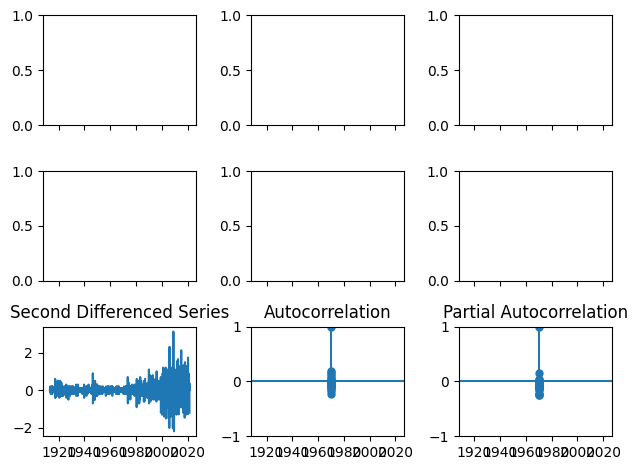

In [ ]:
# Second Differencing
data['CPI_diff_2'] = data['CPI_diff'].diff()
data = data.dropna()

# Plot the differenced series
fig, axes = plt.subplots(3, 3, sharex=True)
axes[2, 0].plot(data['CPI_diff_2'])
axes[2, 0].set_title('Second Differenced Series')
plot_acf(data['CPI_diff_2'], ax=axes[2, 1])
plot_pacf(data['CPI_diff_2'], ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
model = SARIMAX(train['CPI'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CPI   No. Observations:                 1040
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 395.886
Date:                            Tue, 19 Nov 2024   AIC                           -781.772
Time:                                    15:04:19   BIC                           -757.169
Sample:                                03-01-1913   HQIC                          -772.427
                                     - 10-01-1999                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8973      0.015     59.256      0.000       0.868       0.927
ma.L1         -0.5833      0.028   

In [ ]:
predictions = results.predict(start=test.index[0], end=test.index[-1], dynamic=False)

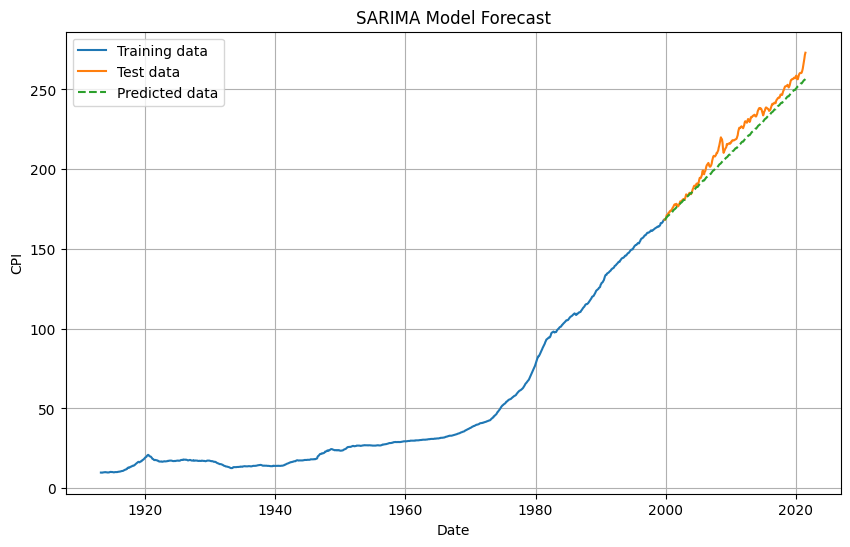

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'], label='Training data')
plt.plot(test.index, test['CPI'], label='Test data')
plt.plot(predictions.index, predictions, label='Predicted data', linestyle='--')
plt.title("SARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mse = mean_squared_error(test['CPI'], predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 46.80647345181785


In [ ]:
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 6.841525666970624


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(train['CPI'],
                      seasonal=True,
                      m=12,
                      stepwise=True,
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-833.766, Time=11.09 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-385.259, Time=0.24 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-546.805, Time=1.84 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-708.904, Time=1.57 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=-758.187, Time=11.45 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=-761.084, Time=3.51 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=-835.122, Time=11.65 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=-779.864, Time=6.99 sec
 ARIMA(2,2,2)(2,0,2)[12]             : AIC=-831.693, Time=10.86 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=-835.790, Time=8.95 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=-766.821, Time=2.64 sec
 ARIMA(1,2,2)(1,0,2)[12]             : AIC=-837.638, Time=8.87 sec
 ARIMA(1,2,2)(0,0,2)[12]             : AIC=-768.824, Time=2.81 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=-835.563, Time=3.97 sec
 ARIMA(1,2,2)(2

In [ ]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 1040
Model:             SARIMAX(1, 2, 1)x(1, 0, [1, 2], 12)   Log Likelihood                 425.770
Date:                                 Tue, 19 Nov 2024   AIC                           -839.540
Time:                                         15:08:07   BIC                           -809.869
Sample:                                     03-01-1913   HQIC                          -828.283
                                          - 10-01-1999                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2562      0.027      9.448      0.000       0.203       0

In [ ]:
y_pred = model.predict(n_periods=len(test))

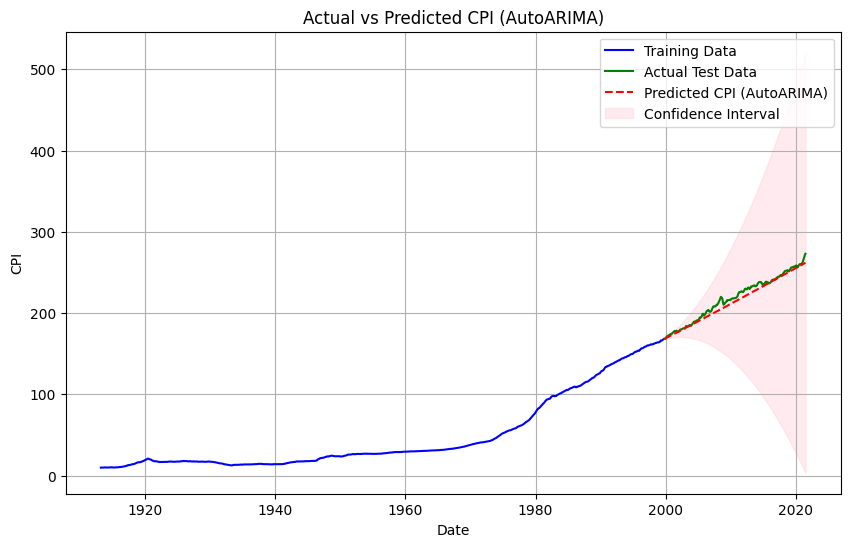

In [ ]:
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

forecast_index = test.index

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'], label="Training Data", color="blue")
plt.plot(test.index, test['CPI'], label="Actual Test Data", color="green")
plt.plot(forecast_index, forecast, label="Predicted CPI (AutoARIMA)", color="red", linestyle='--')
plt.fill_between(forecast_index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color="pink", alpha=0.3, label="Confidence Interval")
plt.title("Actual vs Predicted CPI (AutoARIMA)")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mse = mean_squared_error(test['CPI'], y_pred)
print("MSE:", mse)

MSE: 134.6058861818864


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 6.841525666970624


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data['CPI'], trend='add', seasonal='mul', seasonal_periods=12)
results = model.fit()
predictions = results.predict(start=test.index[0], end=test.index[-1])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


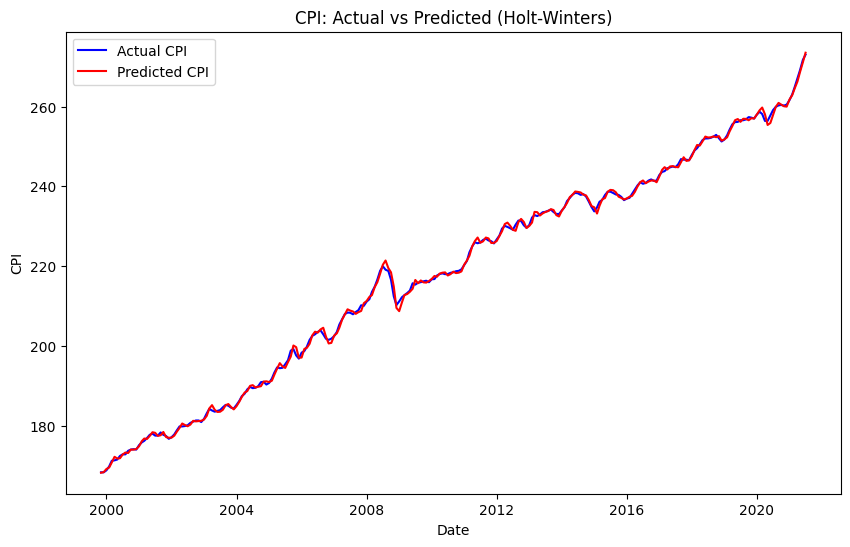

In [ ]:
# Actual values (test data)
y_true = test['CPI']

# Predictions (from Holt-Winters model)
y_pred = predictions

plt.figure(figsize=(10,6))
plt.plot(test.index, y_true, label='Actual CPI', color='blue')
plt.plot(test.index, y_pred, label='Predicted CPI', color='red')
plt.title('CPI: Actual vs Predicted (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()


In [ ]:
mse = mean_squared_error(y_true, y_pred)
print(mse)

0.4313462345660483


In [ ]:
rmse = np.sqrt(mse)
print(rmse)

0.6567695444872945


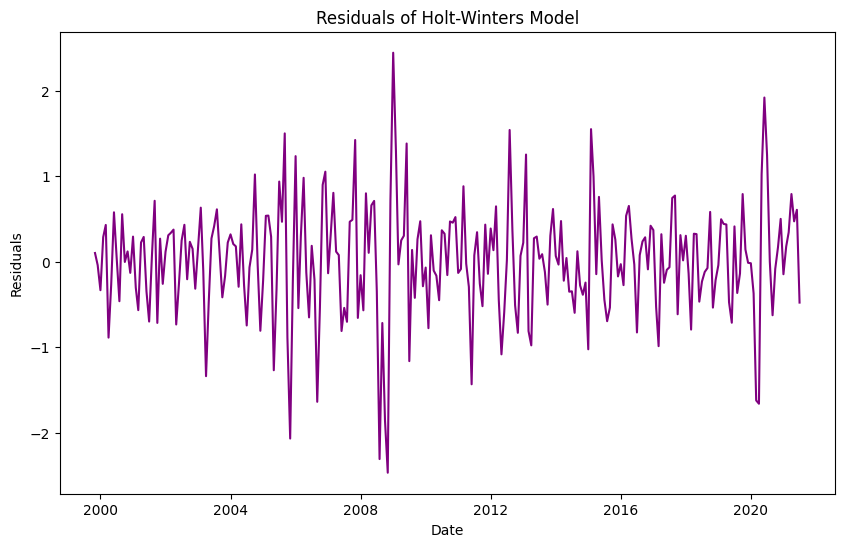

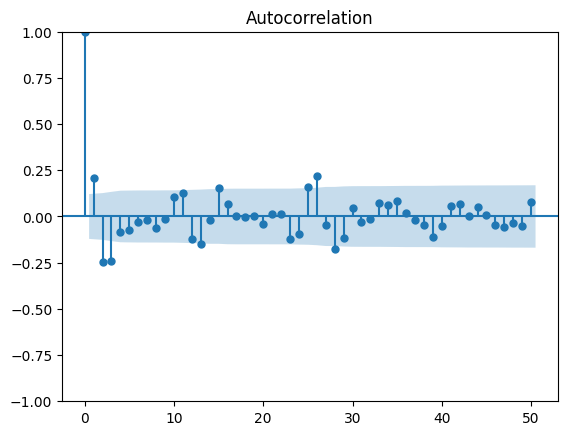

In [ ]:
# Calculate residuals
residuals = y_true - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
plt.plot(test.index, residuals, color='purple')
plt.title('Residuals of Holt-Winters Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Check for autocorrelation in residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=50)
plt.show()


<ipython-input-148-1f992b4954eb>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=test.index[-1], periods=13, freq='M')[1:], future_predictions, label='Future Forecast', color='green')


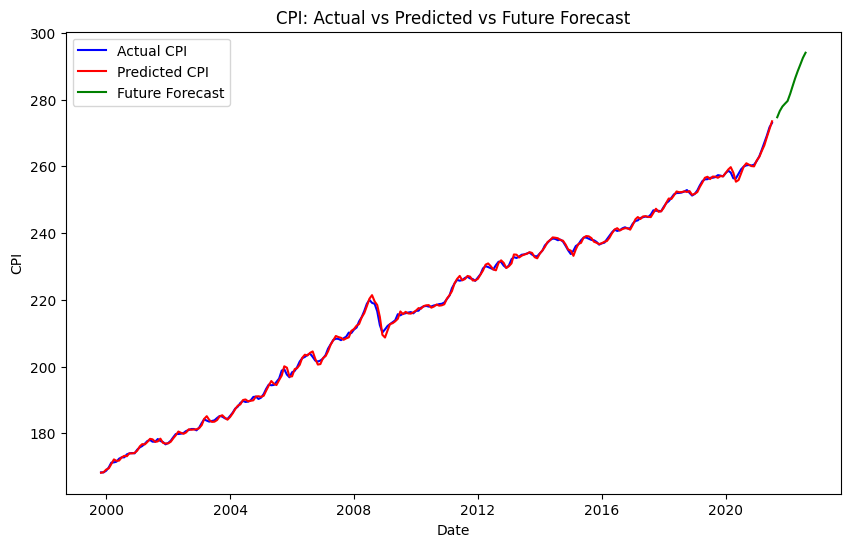

Future Forecast:
2021-08-01    274.685752
2021-09-01    276.551435
2021-10-01    277.905104
2021-11-01    278.741418
2021-12-01    279.558172
2022-01-01    281.725552
2022-02-01    283.975341
2022-03-01    286.417465
2022-04-01    288.529959
2022-05-01    290.518055
2022-06-01    292.492663
2022-07-01    294.021858
Freq: MS, dtype: float64


In [ ]:
# Forecast for the next 12 months (for example)
future_predictions = results.forecast(steps=12)

# Plot the future predictions
plt.figure(figsize=(10,6))
plt.plot(test.index, y_true, label='Actual CPI', color='blue')
plt.plot(test.index, y_pred, label='Predicted CPI', color='red')
plt.plot(pd.date_range(start=test.index[-1], periods=13, freq='M')[1:], future_predictions, label='Future Forecast', color='green')
plt.title('CPI: Actual vs Predicted vs Future Forecast')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.show()

# Print the forecasted values
print("Future Forecast:")
print(future_predictions)
